In [2]:
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

%matplotlib inline

## Look at Results from Different Models

 We will be analyzing the results from different models. The data from November 25 -- with results from a sparse autoencoder with KL-divergence regularizer -- will be compared to the results from a beta-variational autoencoder (with a beta value of 0.25). Each model was run 20 times with a different seed each time.

In [52]:
# load a CSV from a previous run
df_results = pd.read_csv('results_2019-11-25_sparse_kl_beta-vae.csv',index_col=False)
df_results.drop('Unnamed: 0', axis=1, inplace=True)
df_results.head()

,model_name,class_normal,method,best_threshold,best_roc_score
0,sparse_kl,0,mse,0.007034,0.826086
1,sparse_kl,0,rmse,0.080387,0.828392
2,sparse_kl,0,euclid_dist,2.250830,0.828392
3,beta_vae,0,mse,0.017603,0.841240
4,beta_vae,0,rmse,0.135232,0.845728


In [53]:
# class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names_list = list(zip(class_names, range(len(class_names))))

y_names = []
for i in range(len(class_names)):
    y_names.append(str(i)+", "+class_names_list[i][0])
    
def apply_class_name(cols, class_names):
    class_normal = cols[0]
    return class_names[class_normal]


df_results['class_names'] = df_results[['class_normal']].apply(apply_class_name,args=([y_names]),axis=1)
df_results.head()

,model_name,class_normal,method,best_threshold,best_roc_score,class_names
0,sparse_kl,0,mse,0.007034,0.826086,"0, T-shirt/top"
1,sparse_kl,0,rmse,0.080387,0.828392,"0, T-shirt/top"
2,sparse_kl,0,euclid_dist,2.250830,0.828392,"0, T-shirt/top"
3,beta_vae,0,mse,0.017603,0.841240,"0, T-shirt/top"
4,beta_vae,0,rmse,0.135232,0.845728,"0, T-shirt/top"


In [54]:
df = df_results[df_results['method']=='rmse']
df=df.groupby(['class_normal','model_name']).mean()
df.reset_index(inplace=True)
df['class_names'] = df[['class_normal']].apply(apply_class_name,args=([y_names]),axis=1)
df

,class_normal,model_name,best_threshold,best_roc_score,class_names
0,0,beta_vae,0.135475,0.840406,"0, T-shirt/top"
1,0,sparse_kl,0.088938,0.825099,"0, T-shirt/top"
2,1,beta_vae,0.115756,0.952287,"1, Trouser"
3,1,sparse_kl,0.083045,0.954168,"1, Trouser"
4,2,beta_vae,0.138274,0.810099,"2, Pullover"
5,2,sparse_kl,0.092362,0.801457,"2, Pullover"
6,3,beta_vae,0.136532,0.856594,"3, Dress"
7,3,sparse_kl,0.084879,0.836470,"3, Dress"
8,4,beta_vae,0.137128,0.837358,"4, Coat"
9,4,sparse_kl,0.090873,0.822486,"4, Coat"


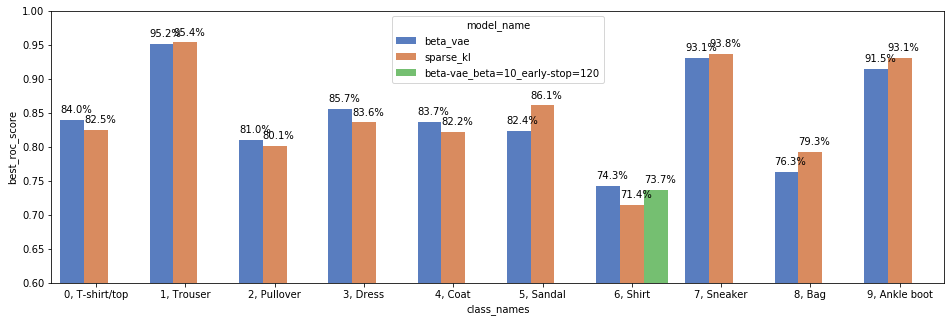

In [55]:
# plot all the results
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x='class_names', y='best_roc_score', data=df,palette="muted", ax=ax, hue='model_name')
plt.ylim(0.6, 1.0)

# add value labels onto bar, from stackoverflow: http://bit.ly/34qzIgg
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1%}'.format(height), (x, y + height + 0.01))

plt.show()